In [63]:
from itertools import chain
from pathlib import Path


def convert(path):
    f = open(path)
    name_file = Path(f.name).stem

    name_file = name_file.replace('DecisionTreeClassifier','DT').replace('XGBClassifier','XB').replace('RandomForestClassifier','RF').replace('X_','')\
        .replace('chi2','C').replace('mRMR','M').replace('X_','')

    data_algo = name_file.split('__')
    final_name = f'{data_algo[0]}_{data_algo[1]}'


    data = json.load(f)

    trainings = data['mean_fit_time']
    mccs = data['mean_test_MCC']
    kappass = data['mean_test_Kappa']
    params = data['params']
    zipSorted=sorted(zip(mccs,kappass,trainings, params),key = lambda t: t[0],reverse=True)
    my_dict=params
    my_data=[]
    for mcc, kappa, training, param in zipSorted:
        score={"Algo":final_name ,"Training time": training,'MCC':mcc , 'Kappa':kappa }
        my_data_tmp =  dict(chain.from_iterable(d.items() for d in (score, param)))
        my_data.append(my_data_tmp)
    return final_name , pd.DataFrame(data=my_data)

In [64]:
from os import listdir
from os.path import isfile, join



In [65]:
import os

current_directory = os.getcwd()
print(current_directory)

os.chdir("C:\\Users\\abder\\OneDrive\\Documents\\phd\\implementation software\\Notebooks\\TinyML")
print("Directory changed to:", os.getcwd())

C:\Users\abder\OneDrive\Documents\phd\implementation software\Notebooks\TinyML
Directory changed to: C:\Users\abder\OneDrive\Documents\phd\implementation software\Notebooks\TinyML


In [66]:
mypath = "result_bot_bin"
my_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [67]:

my_files

['RandomForestClassifier__X.json',
 'RandomForestClassifier__X_A_chi2_20.json',
 'RandomForestClassifier__X_A_chi2_40.json',
 'RandomForestClassifier__X_A_chi2_60.json',
 'RandomForestClassifier__X_A_mRMR_20.json',
 'RandomForestClassifier__X_A_mRMR_40.json',
 'RandomForestClassifier__X_A_mRMR_60.json',
 'XGBClassifier__X.json',
 'XGBClassifier__X_A_chi2_20.json',
 'XGBClassifier__X_A_chi2_40.json',
 'XGBClassifier__X_A_chi2_60.json',
 'XGBClassifier__X_A_mRMR_20.json',
 'XGBClassifier__X_A_mRMR_40.json',
 'XGBClassifier__X_A_mRMR_60.json']

In [68]:
import json
import pandas as pd

my_result_mean = {}
for f in my_files:
  path_file = join(mypath, f)
  k,v = convert(path_file)
  my_result_mean[k] = v

In [69]:
my_result_mean.keys()

dict_keys(['RF_X', 'RF_A_C_20', 'RF_A_C_40', 'RF_A_C_60', 'RF_A_M_20', 'RF_A_M_40', 'RF_A_M_60', 'XB_X', 'XB_A_C_20', 'XB_A_C_40', 'XB_A_C_60', 'XB_A_M_20', 'XB_A_M_40', 'XB_A_M_60'])

In [70]:
my_result_mean["RF_A_C_20"]

,Algo,Training time,MCC,Kappa,n_estimators
0,RF_A_C_20,152.751742,0.956171,0.956156,100
1,RF_A_C_20,108.496685,0.956021,0.956006,70
2,RF_A_C_20,62.080471,0.955987,0.955973,40
3,RF_A_C_20,31.786368,0.955549,0.955533,20
4,RF_A_C_20,8.515477,0.954288,0.954270,5


In [71]:
values = []

for k,v in my_result_mean.items():
    values.append(v)
    

In [72]:
values[0]

,Algo,Training time,MCC,Kappa,n_estimators
0,RF_X,224.682301,0.989139,0.989134,40
1,RF_X,565.808650,0.988915,0.988911,100
2,RF_X,114.133928,0.988852,0.988846,20
3,RF_X,381.368647,0.988844,0.988839,70
4,RF_X,30.703388,0.987884,0.987881,5


In [73]:
concatenated_df = pd.concat(values, ignore_index=True)


In [74]:
(concatenated_df.Algo.unique())

array(['RF_X', 'RF_A_C_20', 'RF_A_C_40', 'RF_A_C_60', 'RF_A_M_20',
       'RF_A_M_40', 'RF_A_M_60', 'XB_X', 'XB_A_C_20', 'XB_A_C_40',
       'XB_A_C_60', 'XB_A_M_20', 'XB_A_M_40', 'XB_A_M_60'], dtype=object)

In [75]:
len(concatenated_df.Algo)

70

In [77]:
df_filtered = concatenated_df[(concatenated_df['Algo'].isin(['XB_A_M_40', 'XB_A_M_60', 'XB_A_M_20', 'XB_A_C_20', 'XB_A_C_60', 'XB_A_C_40', 'XB_X'])) & (concatenated_df['n_estimators'] == 5)]
df_filtered = df_filtered.set_index('Algo').loc[['XB_A_M_40', 'XB_A_M_60', 'XB_A_M_20', 'XB_A_C_20', 'XB_A_C_60', 'XB_A_C_40', 'XB_X']].reset_index()
df_filtered


,Algo,Training time,MCC,Kappa,n_estimators
0,XB_A_M_40,7.635590,0.962173,0.962133,5
1,XB_A_M_60,10.195389,0.963017,0.962983,5
2,XB_A_M_20,4.237985,0.913792,0.913326,5
3,XB_A_C_20,4.737343,0.937897,0.937810,5
4,XB_A_C_60,10.894635,0.960446,0.960428,5
5,XB_A_C_40,7.682289,0.958154,0.958154,5
6,XB_X,13.561415,0.961356,0.961306,5


In [47]:
def bourda_count(my_data_borda):
  rank_points = my_data_borda[['MCC',  'Kappa']].values.argsort(axis=0).argsort(axis=0)

  borda_counts = rank_points.sum(axis=1)

  my_data_borda['Borda'] = borda_counts
  sorted_scores = my_data_borda.sort_values(by=['Borda', 'MCC'], ascending=False)

  return sorted_scores

In [148]:
my_result_mean.keys()

dict_keys(['RF_X', 'RF_A_C_20', 'RF_A_C_40', 'RF_A_C_60', 'RF_A_M_20', 'RF_A_M_40', 'RF_A_M_60', 'XB_X', 'XB_A_C_20', 'XB_A_C_40', 'XB_A_C_60', 'XB_A_M_20', 'XB_A_M_40', 'XB_A_M_60'])

In [149]:
my_result_mean['XB_A_C_20'].sort_values('n_estimators')

,Algo,MCC,Kappa,n_estimators
4,XB_A_C_20,0.937897,0.937810,5
3,XB_A_C_20,0.953994,0.953960,20
2,XB_A_C_20,0.957115,0.957086,40
1,XB_A_C_20,0.958569,0.958550,70
0,XB_A_C_20,0.960046,0.960032,100


In [150]:
my_result_mean['RF_A_C_20']

,Algo,MCC,Kappa,n_estimators
0,RF_A_C_20,0.956171,0.956156,100
1,RF_A_C_20,0.956021,0.956006,70
2,RF_A_C_20,0.955987,0.955973,40
3,RF_A_C_20,0.955549,0.955533,20
4,RF_A_C_20,0.954288,0.954270,5


In [151]:
my_result_mean.keys()

dict_keys(['RF_X', 'RF_A_C_20', 'RF_A_C_40', 'RF_A_C_60', 'RF_A_M_20', 'RF_A_M_40', 'RF_A_M_60', 'XB_X', 'XB_A_C_20', 'XB_A_C_40', 'XB_A_C_60', 'XB_A_M_20', 'XB_A_M_40', 'XB_A_M_60'])

In [152]:
# List of keys to keep
keys_to_keep = ['RF_A_C_20','RF_A_M_20', 'RF_A_C_40','RF_A_M_40', 'RF_A_C_60',   'RF_A_M_60','RF_X']

# New dictionary with selected keys and their values
filtered_dict = {key: my_result_mean[key].sort_values('n_estimators') for key in keys_to_keep if key in my_result_mean}


estimators_5 =[filtered_dict[key].MCC.values[filtered_dict[key].n_estimators==5] for key  in filtered_dict.keys()]
estimators_20 =[filtered_dict[key].MCC.values[filtered_dict[key].n_estimators==20] for key  in filtered_dict.keys()]
estimators_40 =[filtered_dict[key].MCC.values[filtered_dict[key].n_estimators==40] for key  in filtered_dict.keys()]
estimators_70 =[filtered_dict[key].MCC.values[filtered_dict[key].n_estimators==70] for key  in filtered_dict.keys()]
estimators_100 =[filtered_dict[key].MCC.values[filtered_dict[key].n_estimators==100] for key  in filtered_dict.keys()]

estimators_5_values = [float("{:.3f}".format(val[0])) for val in estimators_5]
estimators_20_values = [float("{:.3f}".format(val[0])) for val in estimators_20]
estimators_40_values = [float("{:.3f}".format(val[0])) for val in estimators_40]
estimators_70_values = [float("{:.3f}".format(val[0])) for val in estimators_70]
estimators_100_values = [float("{:.3f}".format(val[0])) for val in estimators_100]

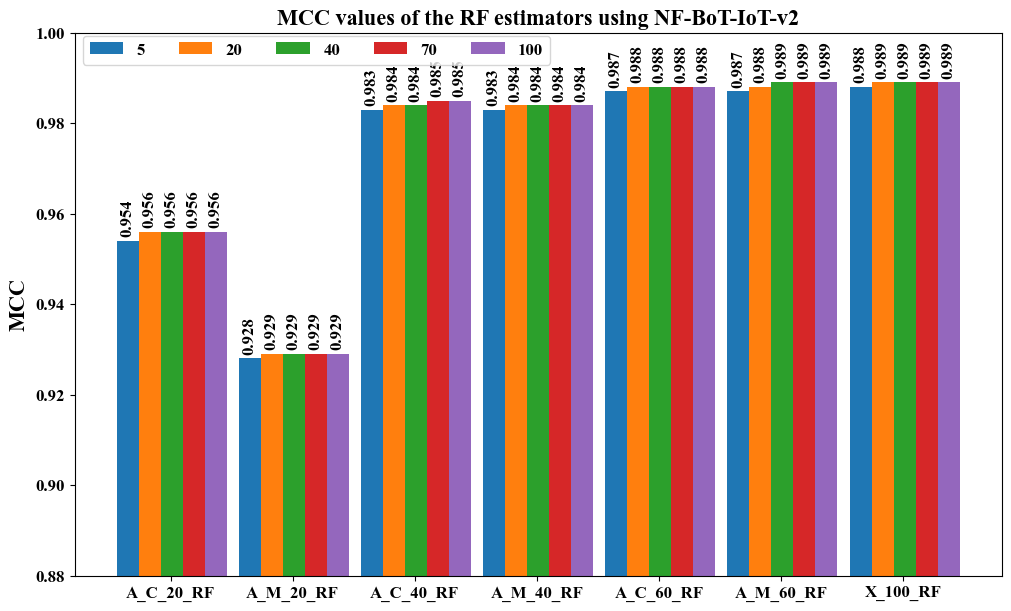

In [153]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ('A_C_20_RF','A_M_20_RF', 'A_C_40_RF','A_M_40_RF', 'A_C_60_RF',   'A_M_60_RF','X_100_RF')
penguin_means = {
    '5': estimators_5_values,
    '20': estimators_20_values,
    '40': estimators_40_values,
    '70': estimators_70_values,
    '100': estimators_100_values
}

x = np.arange(len(species))  # the label locations
width = 0.18  # the width of the bars
multiplier = 0

font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 12.1}
plt.rc('font', **font)

fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))



for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 16}

ax.set_ylabel('MCC', fontdict=font)
ax.set_title('MCC values of the RF estimators using NF-BoT-IoT-v2', fontdict=font)
ax.set_xticks(x + width+0.17, species)
ax.legend(loc='upper left', ncols=5, bbox_to_anchor=(0, 1.01))
ax.set_ylim(0.88, 1)

plt.show()

In [154]:
# List of keys to keep
keys_to_keep = ['XB_A_C_20','XB_A_M_20', 'XB_A_C_40','XB_A_M_40', 'XB_A_C_60',   'XB_A_M_60','XB_X']

# New dictionary with selected keys and their values
filtered_dict = {key: my_result_mean[key].sort_values('n_estimators') for key in keys_to_keep if key in my_result_mean}


estimators_5 =[filtered_dict[key].MCC.values[filtered_dict[key].n_estimators==5] for key  in filtered_dict.keys()]
estimators_20 =[filtered_dict[key].MCC.values[filtered_dict[key].n_estimators==20] for key  in filtered_dict.keys()]
estimators_40 =[filtered_dict[key].MCC.values[filtered_dict[key].n_estimators==40] for key  in filtered_dict.keys()]
estimators_70 =[filtered_dict[key].MCC.values[filtered_dict[key].n_estimators==70] for key  in filtered_dict.keys()]
estimators_100 =[filtered_dict[key].MCC.values[filtered_dict[key].n_estimators==100] for key  in filtered_dict.keys()]

estimators_5_values = [float("{:.3f}".format(val[0])) for val in estimators_5]
estimators_20_values = [float("{:.3f}".format(val[0])) for val in estimators_20]
estimators_40_values = [float("{:.3f}".format(val[0])) for val in estimators_40]
estimators_70_values = [float("{:.3f}".format(val[0])) for val in estimators_70]
estimators_100_values = [float("{:.3f}".format(val[0])) for val in estimators_100]

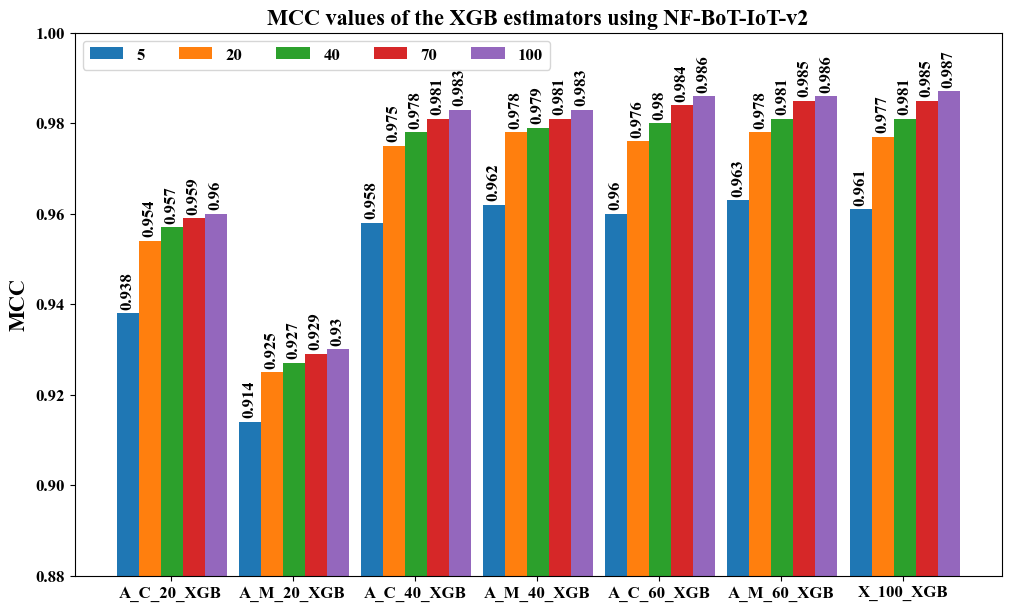

In [155]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ('A_C_20_XGB','A_M_20_XGB', 'A_C_40_XGB','A_M_40_XGB', 'A_C_60_XGB',   'A_M_60_XGB','X_100_XGB')
penguin_means = {
    '5': estimators_5_values,
    '20': estimators_20_values,
    '40': estimators_40_values,
    '70': estimators_70_values,
    '100': estimators_100_values
}

x = np.arange(len(species))  # the label locations
width = 0.18  # the width of the bars
multiplier = 0

font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 12.1}
plt.rc('font', **font)

fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))



for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, rotation=90)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 16}

ax.set_ylabel('MCC', fontdict=font)
ax.set_title('MCC values of the XGB estimators using NF-BoT-IoT-v2', fontdict=font)
ax.set_xticks(x + width+0.17, species)
ax.legend(loc='upper left', ncols=5, bbox_to_anchor=(0, 1.001))
ax.set_ylim(0.88, 1)

plt.show()

### Decision Tree

In [180]:
from os import listdir
from os.path import isfile, join

mypath_DT = "result_ton_bin/DT_with_ccp"
my_files_DT = [f for f in listdir(mypath_DT) if isfile(join(mypath_DT, f))]

In [181]:
import json
import pandas as pd

my_result_mean_DT = {}
for f in my_files_DT:
  path_file = join(mypath_DT, f)
  k,v = convert(path_file)
  my_result_mean_DT[k] = v

In [182]:
my_result_mean_DT.keys()

dict_keys(['DT_X', 'DT_A_C_20', 'DT_A_C_40', 'DT_A_C_60', 'DT_A_M_20', 'DT_A_M_40', 'DT_A_M_60'])

In [183]:
my_list = ['DT_A_C_20', 'DT_A_M_20', 'DT_A_C_40', 'DT_A_M_40', 'DT_A_C_60', 'DT_A_M_60', 'DT_X']

dfs = []
for k in my_list:
    dfs.append(my_result_mean_DT[k])

results_DT = pd.concat(dfs)

results_DT

,Algo,MCC,Kappa
0,DT_A_C_20,0.877715,0.877542
0,DT_A_M_20,0.833671,0.833048
0,DT_A_C_40,0.894394,0.890977
0,DT_A_M_40,0.908071,0.905667
0,DT_A_C_60,0.896553,0.893303
0,DT_A_M_60,0.909629,0.907176
0,DT_X,0.889366,0.884168


In [179]:
results_DT

,Algo,MCC,Kappa
0,DT_A_C_20,0.957357,0.957343
0,DT_A_M_20,0.930546,0.929832
0,DT_A_C_40,0.985176,0.985165
0,DT_A_M_40,0.984489,0.984477
0,DT_A_C_60,0.989609,0.989608
0,DT_A_M_60,0.990092,0.990090
0,DT_X,0.989608,0.989606
